## IMPORTING LIBRARIES

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC

## DATA COLLECTION AND DATA DESCRIPTION

In [2]:
heart_data = pd.read_csv('/content/heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_data.shape

(1025, 14)

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

## DATA CLEANING

In [9]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#taking care of duplicate values
data_dup = heart_data.duplicated().any()

In [11]:
data_dup

True

In [12]:
data = heart_data.drop_duplicates()

In [13]:
data_dup = heart_data.duplicated().any()

In [14]:
data_dup

True

## STATISTICAL ANALYSIS ON THE DATASET (EDA)

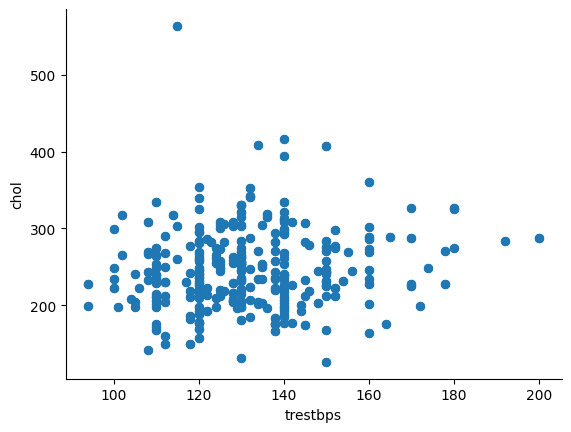

In [15]:
# trestbps vs chol

from matplotlib import pyplot as plt
heart_data.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

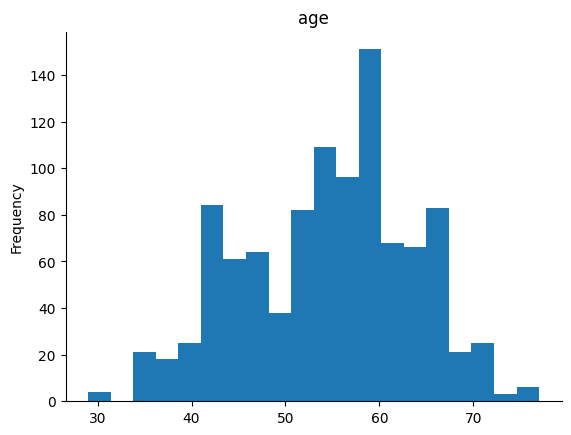

In [16]:
#Age
from matplotlib import pyplot as plt
heart_data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

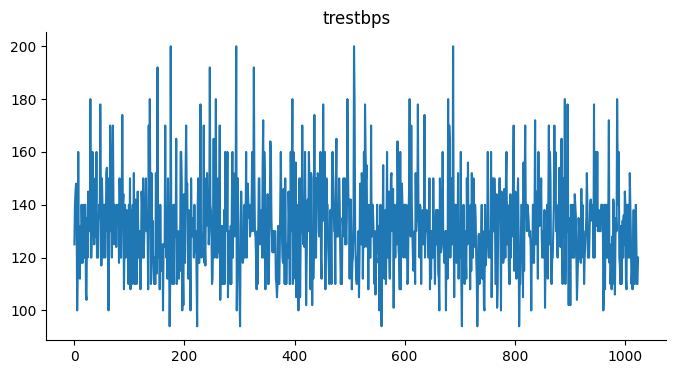

In [17]:
#Trestbps
from matplotlib import pyplot as plt
heart_data['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Sex Distribution according to Target')

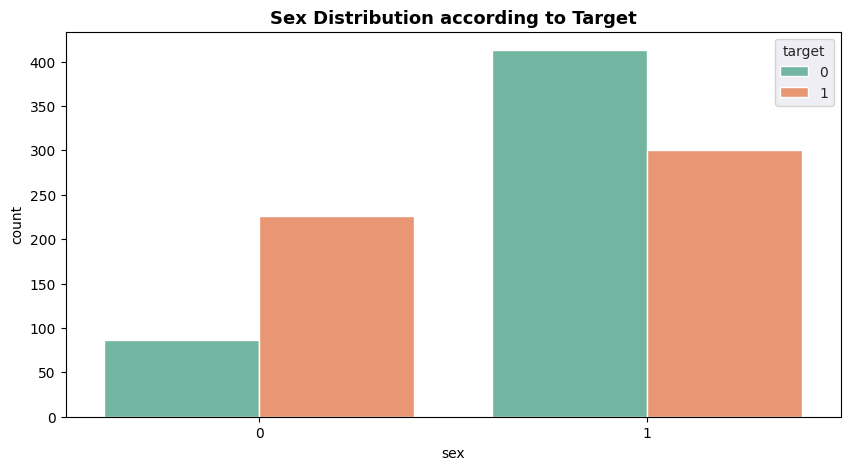

In [18]:
# sex distribution according to target
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.countplot(data= heart_data, x='sex',hue='target')
plt.title('Sex Distribution according to Target', fontsize = 13, weight = 'bold')

Text(0.5, 1.0, 'chest pain distribution according to target')

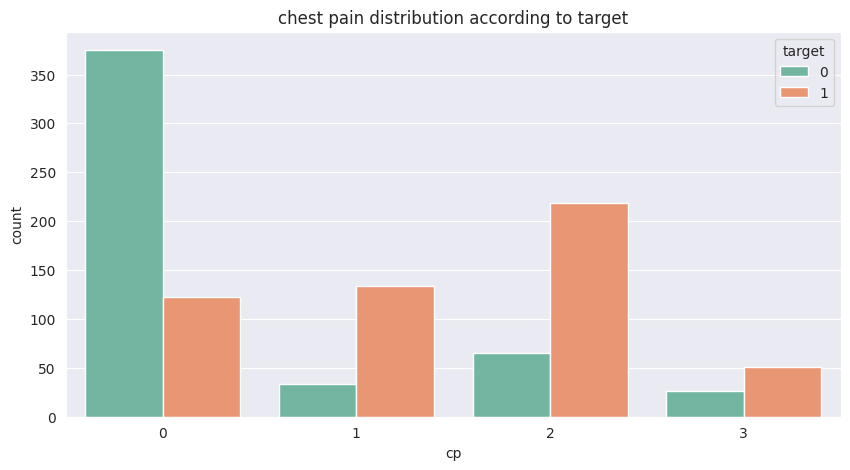

In [19]:
# chest pain distribution according to target
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data= heart_data, x='cp',hue='target')
plt.title('chest pain distribution according to target')

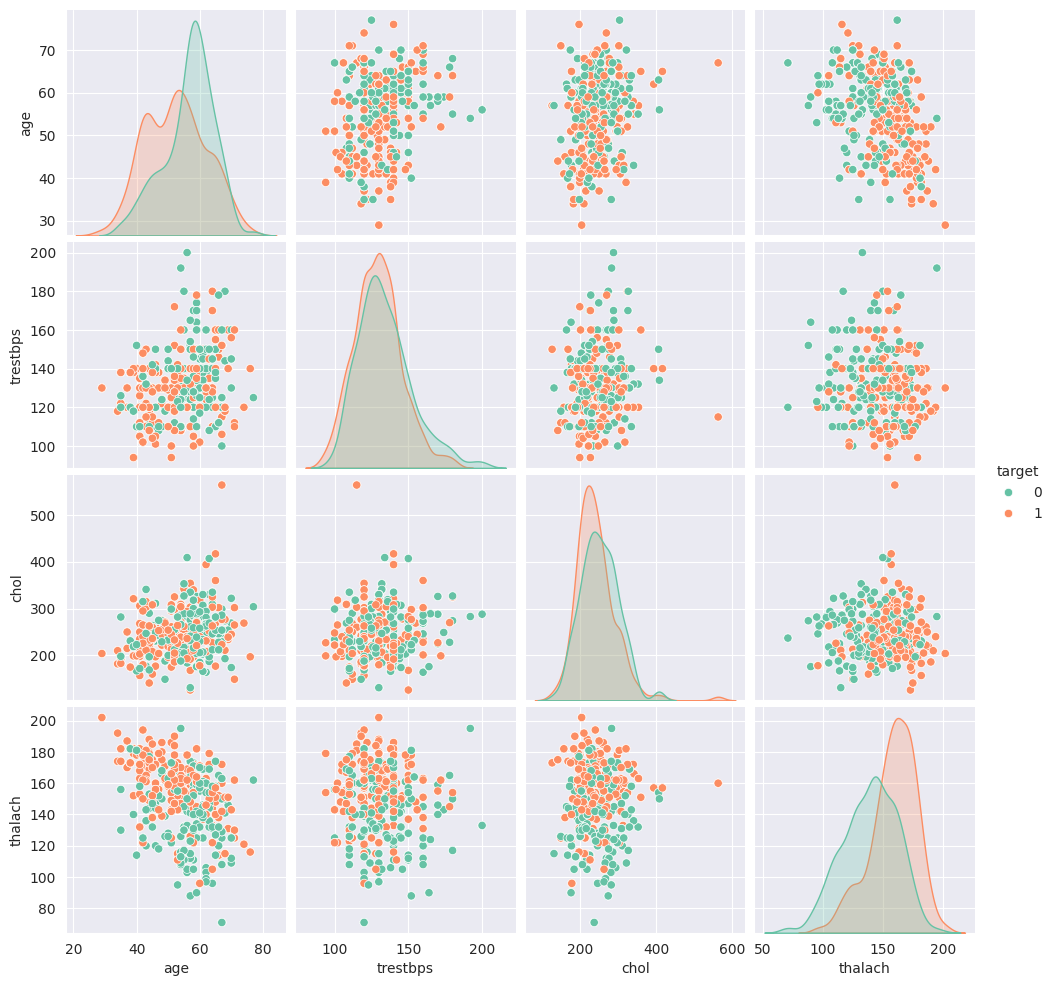

In [20]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach']
categorical_features = ['sex', 'cp', 'fbs', 'restceg', 'exang', 'slope', 'ca', 'tha;']
sns.pairplot(heart_data[numeric_features+['target']], hue = 'target')

<Axes: xlabel='age', ylabel='fbs'>

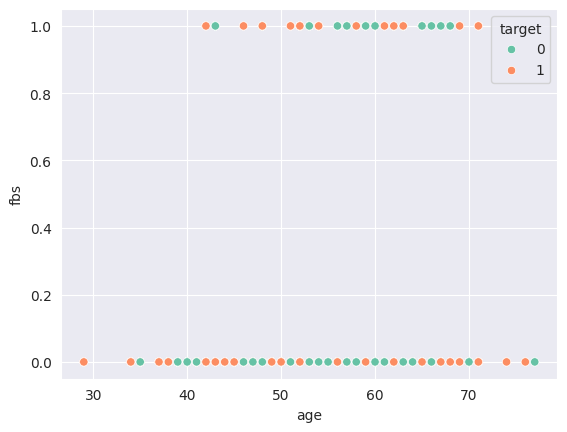

In [21]:
# Relationship between Age and fbs
sns.scatterplot(x = 'age', y = 'fbs', hue = 'target', data = heart_data)

<Axes: xlabel='age', ylabel='cp'>

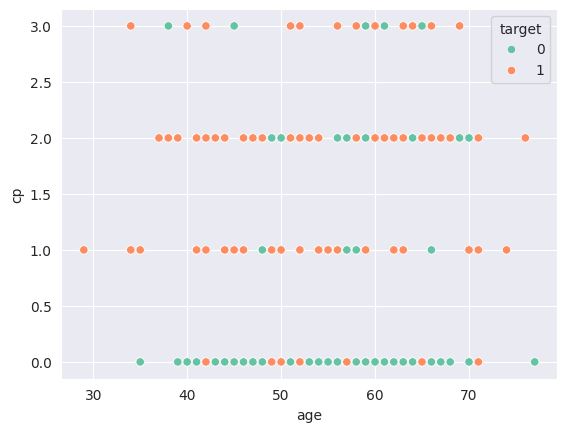

In [22]:
# Relationship between Age and cp
sns.scatterplot(x = 'age', y = 'cp', hue = 'target', data = heart_data)

<Axes: xlabel='age', ylabel='trestbps'>

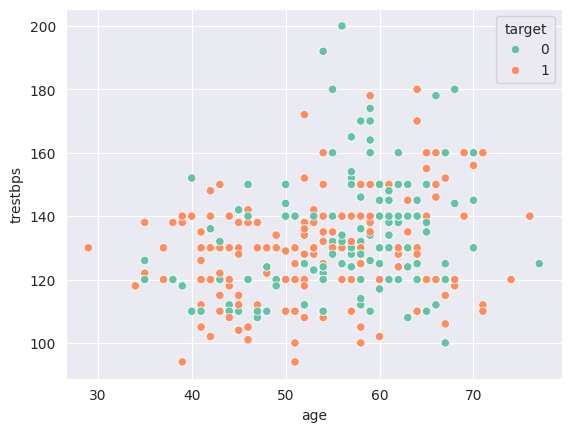

In [23]:
# Relationship between Age and trestbps
sns.scatterplot(x = 'age', y = 'trestbps', hue = 'target', data = heart_data)

<Axes: xlabel='age', ylabel='chol'>

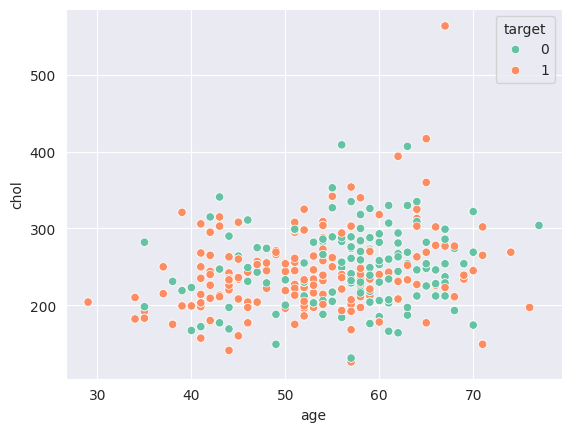

In [24]:
# Relationship between Age and chol
sns.scatterplot(x = 'age', y = 'chol', hue = 'target', data = heart_data)

<Axes: xlabel='age', ylabel='restecg'>

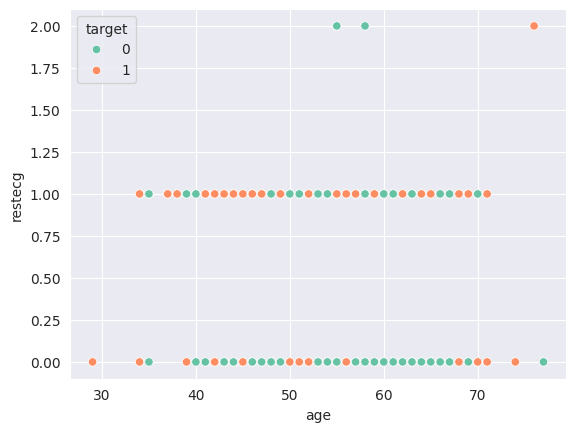

In [25]:
# Relationship between Age and restecg
sns.scatterplot(x = 'age', y = 'restecg', hue = 'target', data = heart_data)

<Axes: xlabel='age', ylabel='thalach'>

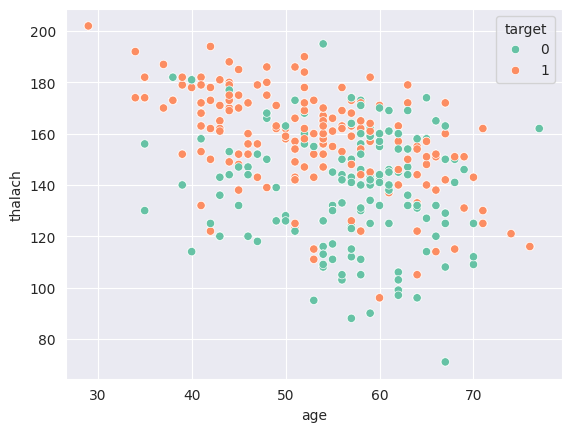

In [26]:
# Relationship between Age and thalach
sns.scatterplot(x = 'age', y = 'thalach', hue = 'target', data = heart_data)

<Axes: xlabel='age', ylabel='exang'>

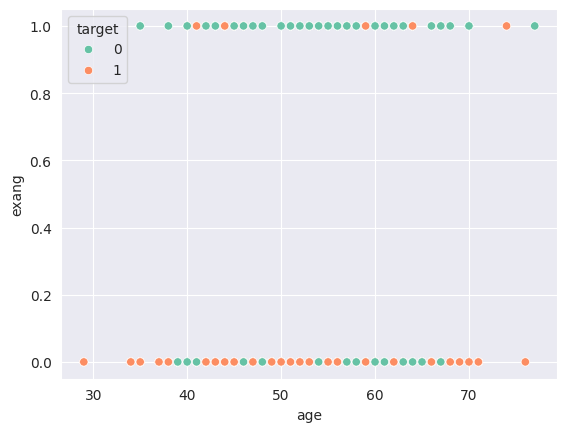

In [27]:
# Relationship between Age and exang
sns.scatterplot(x = 'age', y = 'exang', hue = 'target', data = heart_data)

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


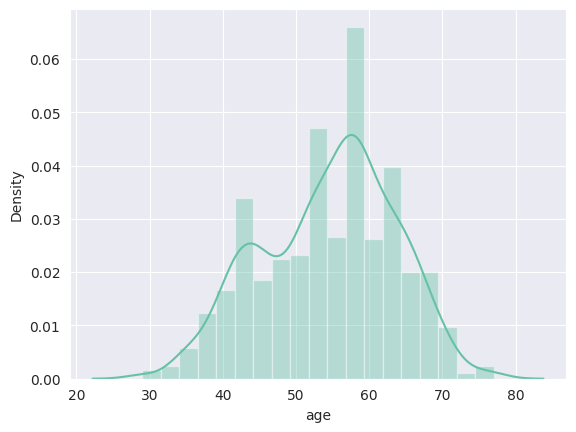

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


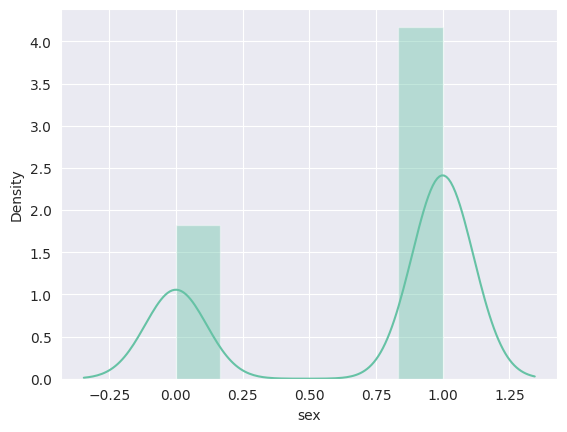

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


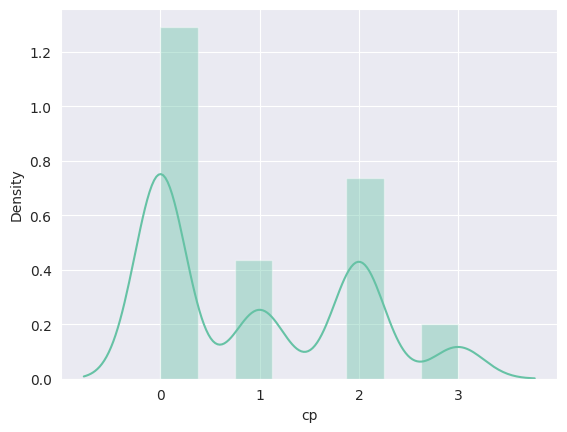

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


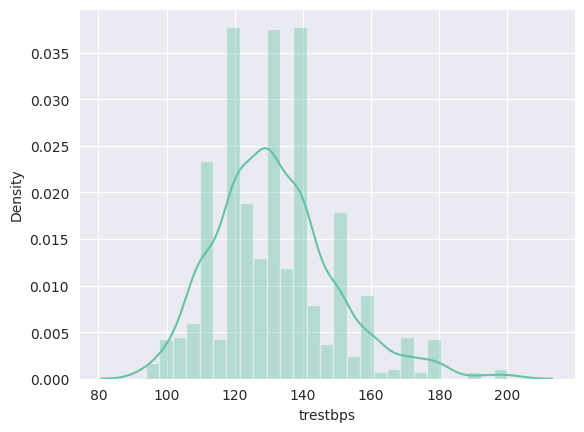

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


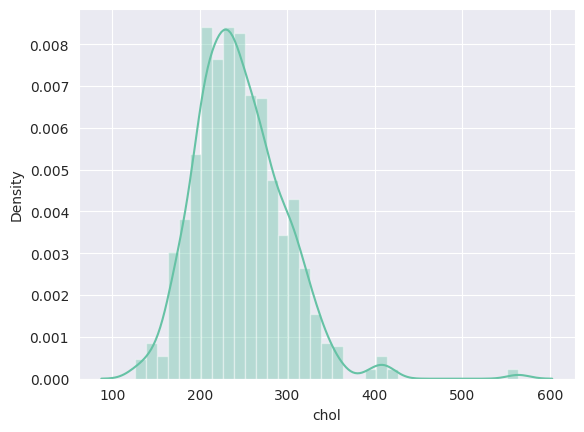

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


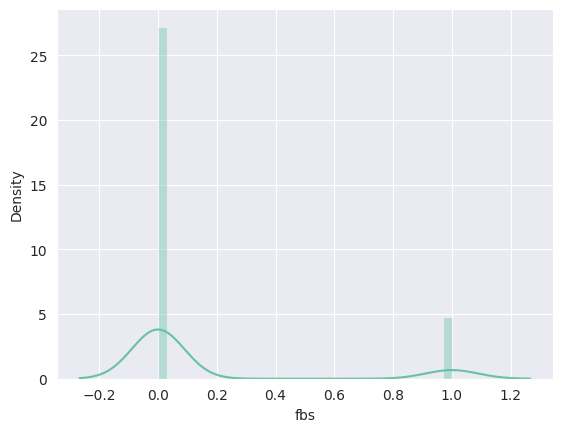

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


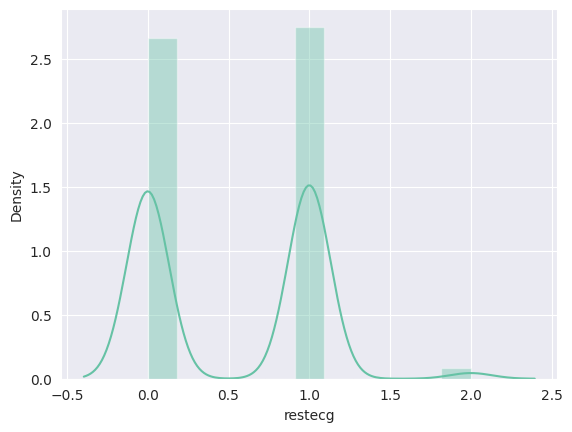

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


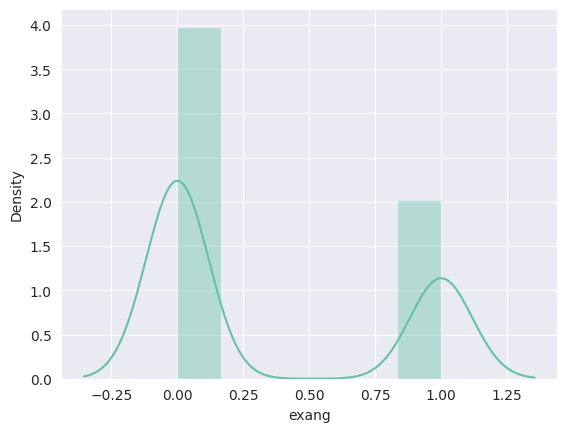

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


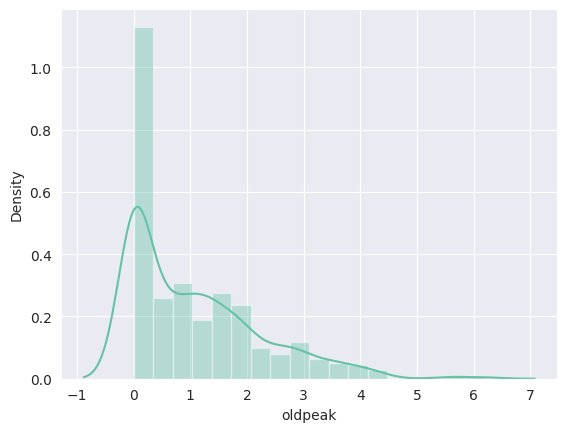

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


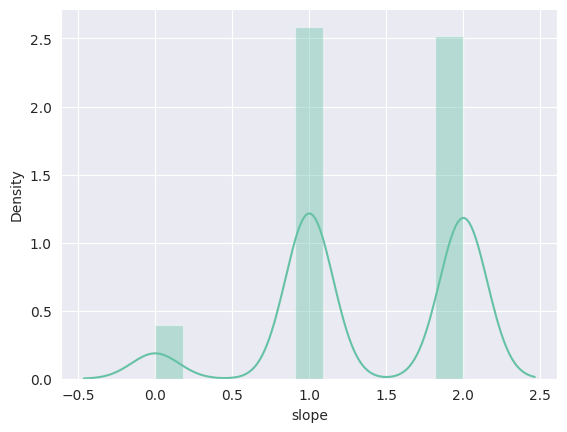

<ipython-input-28-eb4feea81745>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[feature])


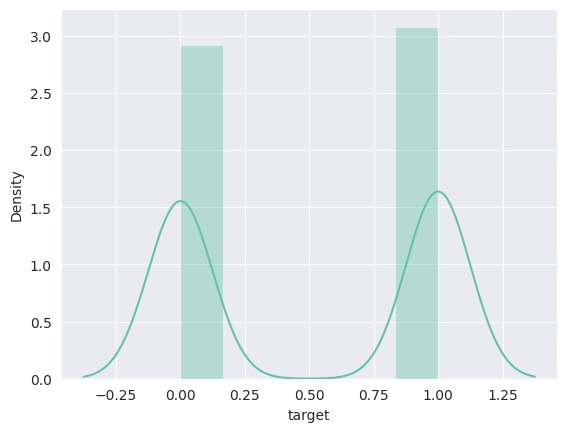

In [28]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'target']
for feature in columns:
  #if feature not in ['thal','ca']:
  sns.distplot(heart_data[feature])
  plt.show()

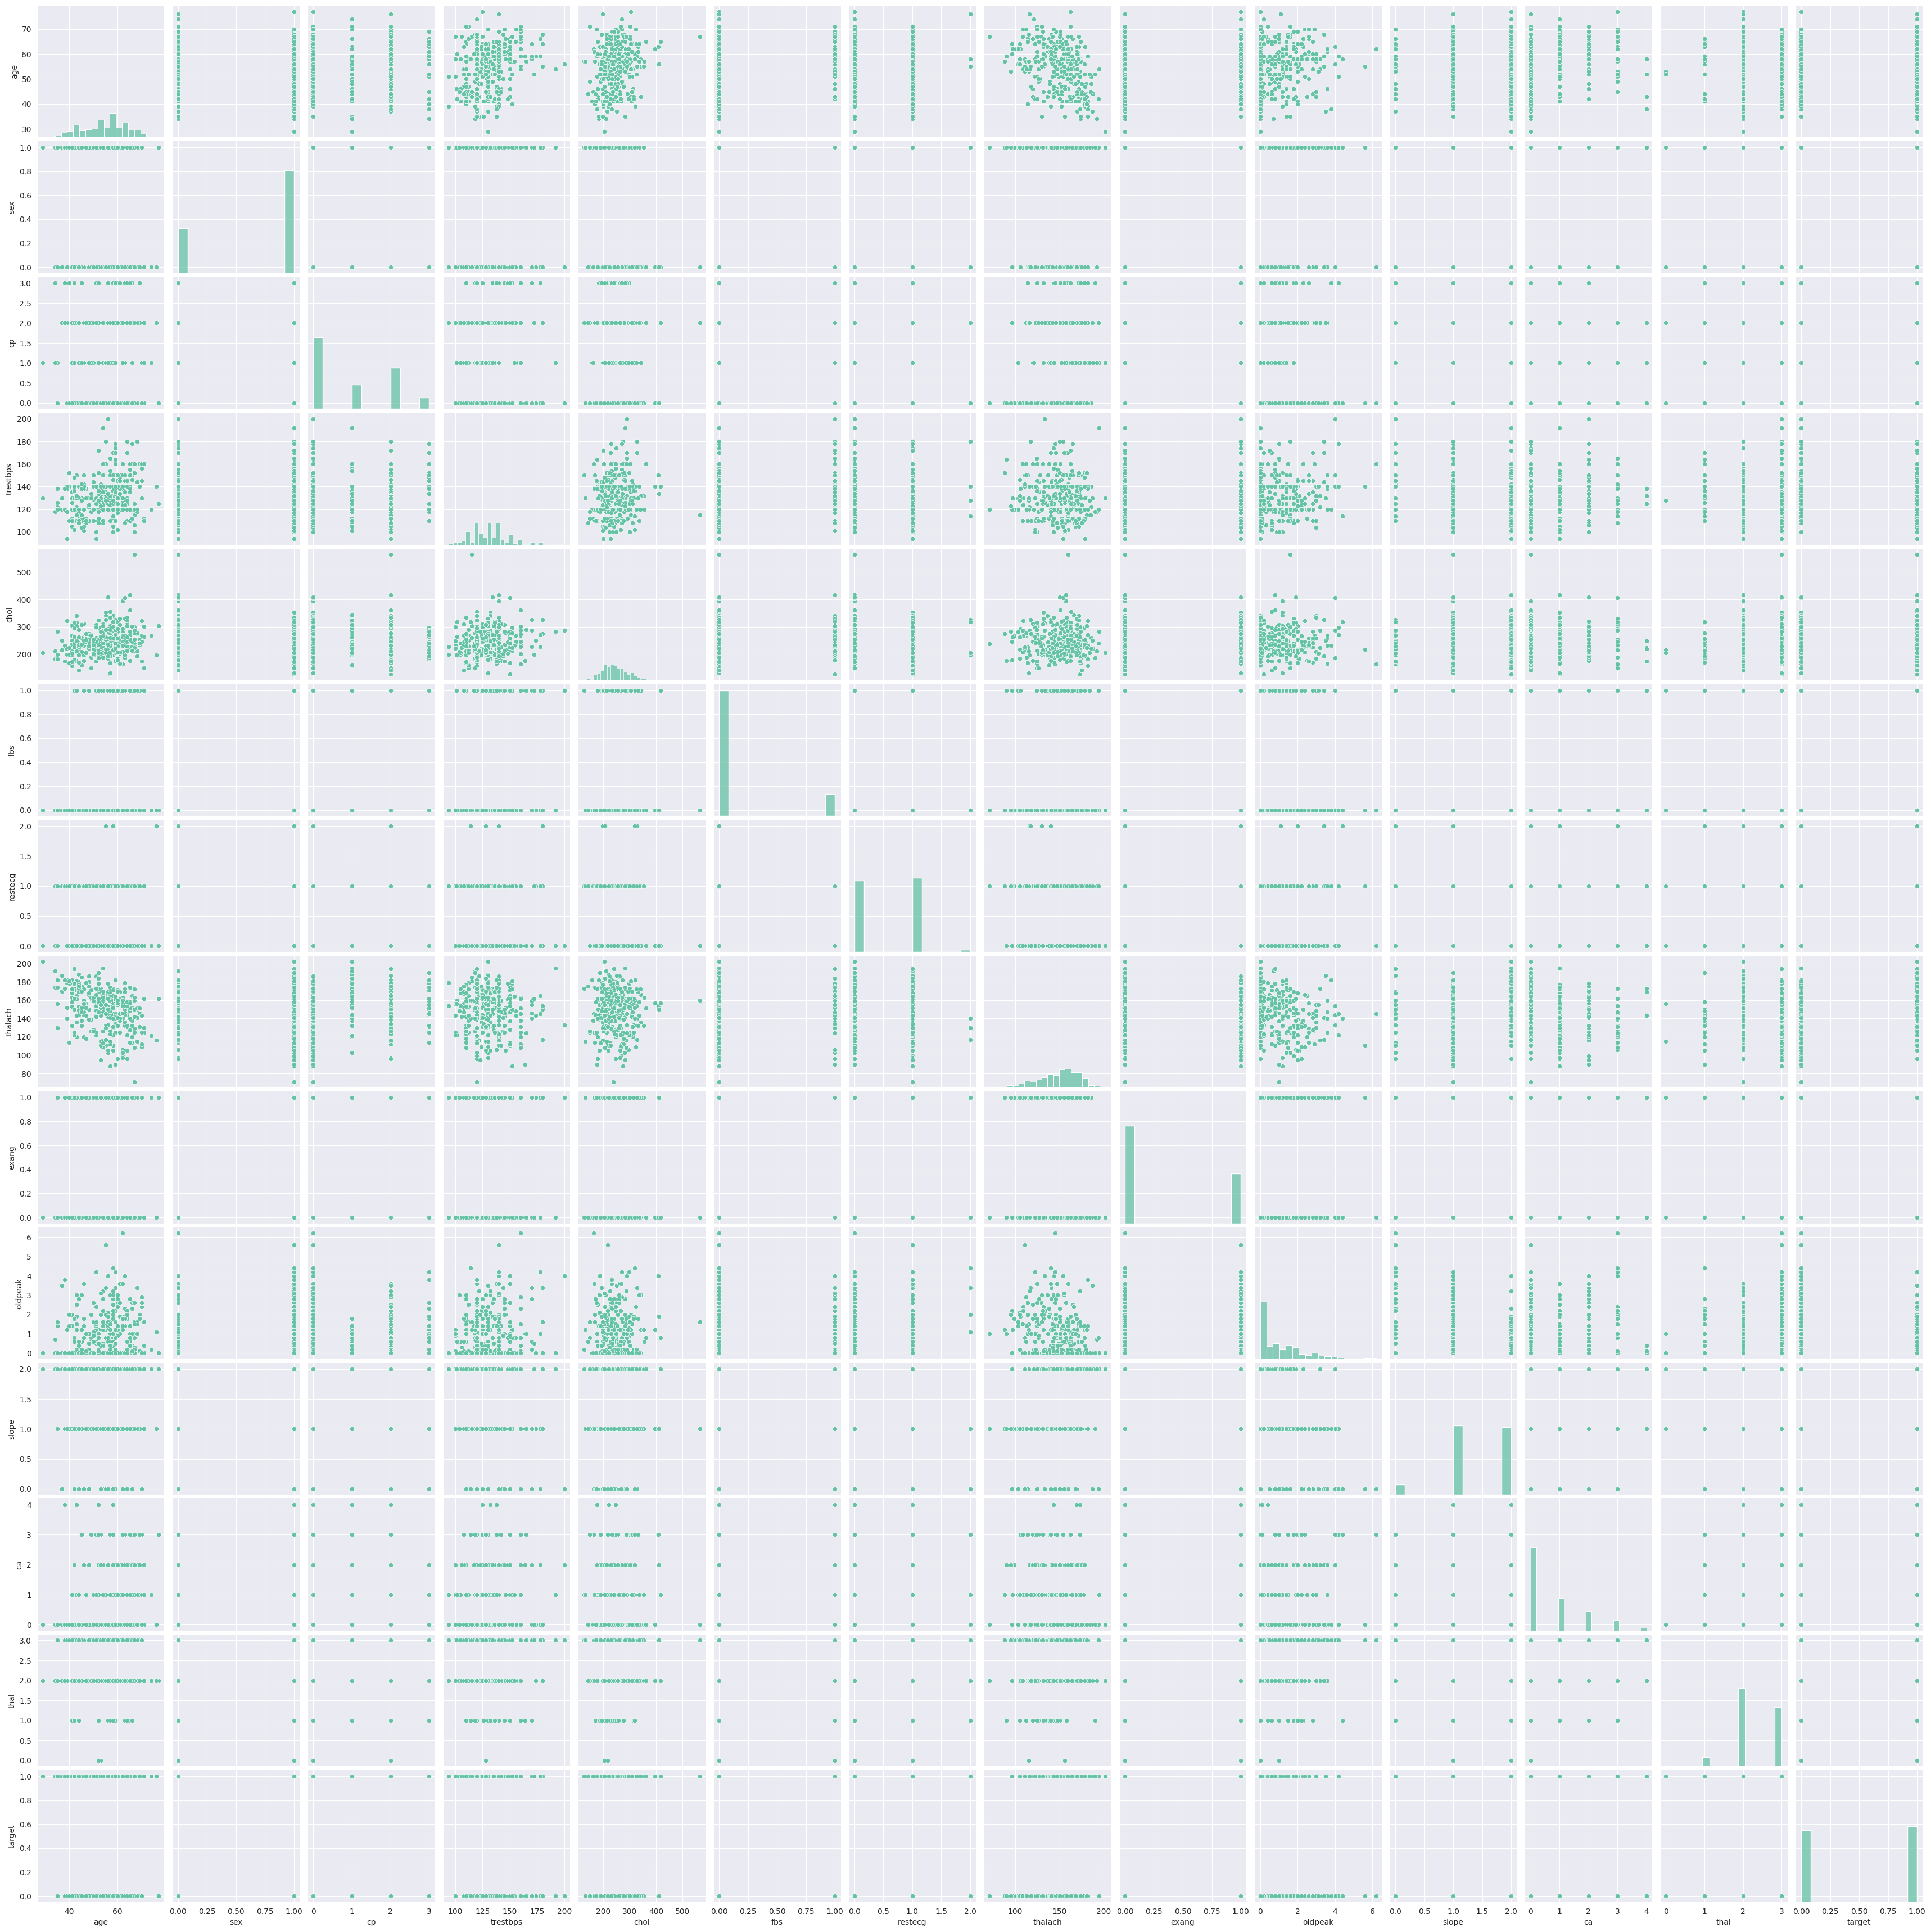

In [29]:
sns.pairplot(heart_data)

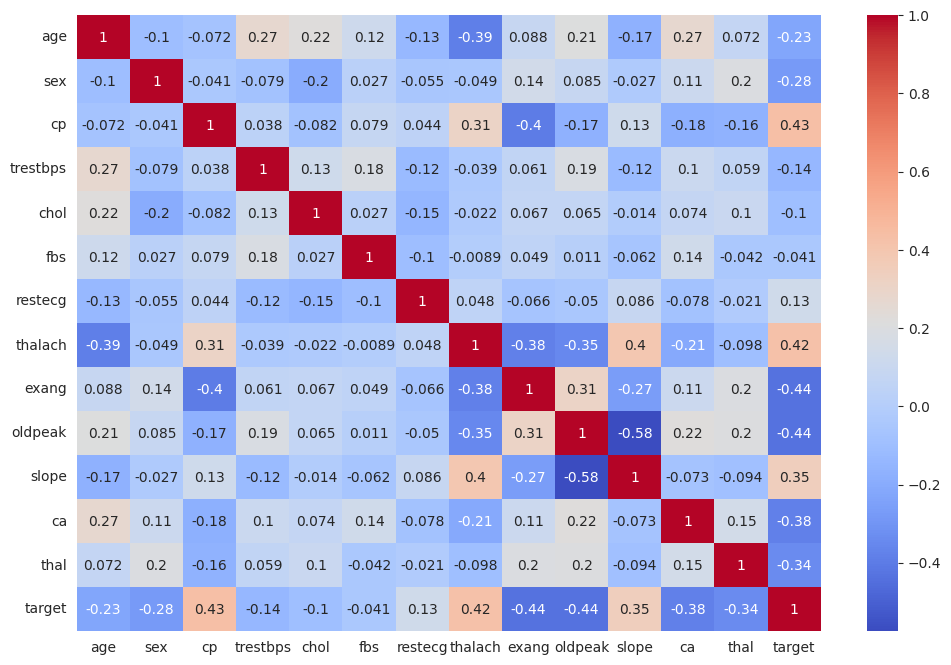

In [30]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = heart_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="coolwarm")

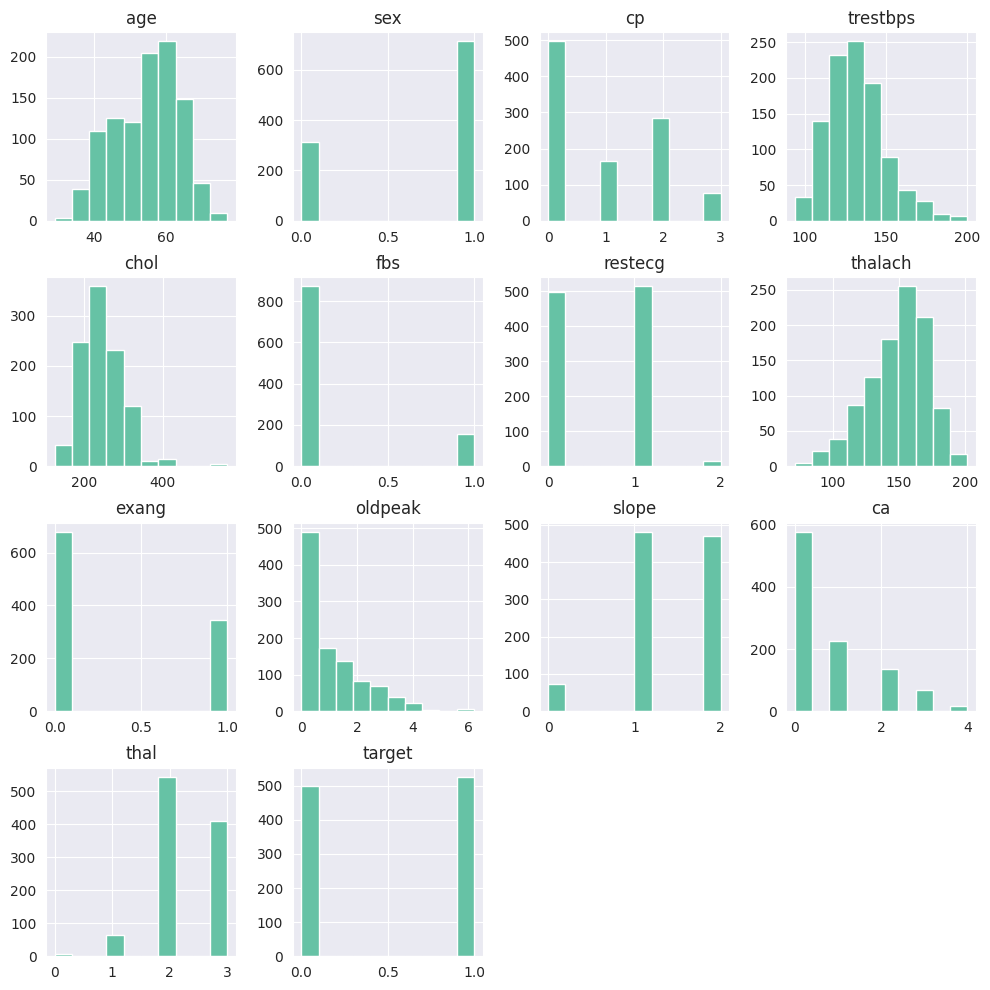

In [31]:
heart_data.hist(figsize = (12, 12))
plt.show()

<ipython-input-32-8025ebf11cde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=heart_data,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

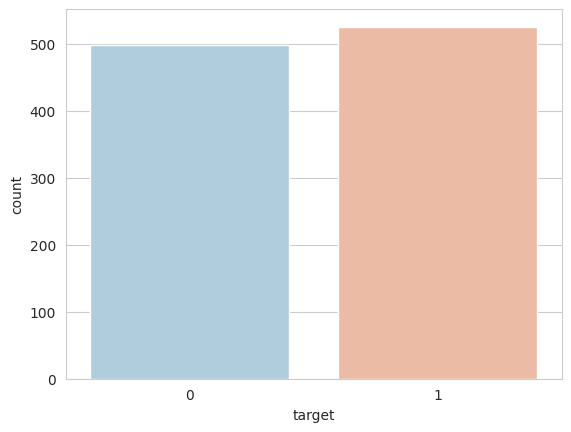

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_data,palette='RdBu_r')

## DATA PROCESSING

In [16]:
x = heart_data.drop('target',axis=1)

In [17]:
y = heart_data['target']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [21]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

In [22]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [23]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

## LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred1 = log.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7853658536585366

## SVC

In [43]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [44]:
y_pred2 = svm.predict(x_test)
accuracy_score(y_test,y_pred2)

0.6829268292682927

## KNEIGHBORS CLASSIFIER

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred3=knn.predict(x_test)
accuracy_score(y_test,y_pred3)

0.7317073170731707

In [47]:
score =[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [48]:
score

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6829268292682927,
 0.6780487804878049,
 0.6926829268292682,
 0.7024390243902439,
 0.7024390243902439,
 0.6926829268292682,
 0.697560975609756,
 0.6731707317073171,
 0.6682926829268293,
 0.6439024390243903,
 0.6487804878048781,
 0.6390243902439025,
 0.6585365853658537,
 0.6536585365853659,
 0.6585365853658537,
 0.6341463414634146,
 0.6634146341463415]

## DECISION TREE CLASSIFIER

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred4= dt.predict(x_test)
accuracy_score(y_test,y_pred4)

0.9853658536585366

## RANDOM FOREST CLASSIFIER

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred5= rf.predict(x_test)
accuracy_score(y_test,y_pred5)

0.9853658536585366

## GRADIENT BOOSTING CLASSIFIER

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
y_pred6 = gbc.predict(x_test)
accuracy_score(y_test,y_pred6)

0.9317073170731708

In [55]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)]})

In [56]:
final_data

,Models,ACC
0,LR,0.785366
1,SVM,0.682927
2,KNN,0.731707
3,DT,0.985366
4,RF,0.985366
5,GB,0.931707


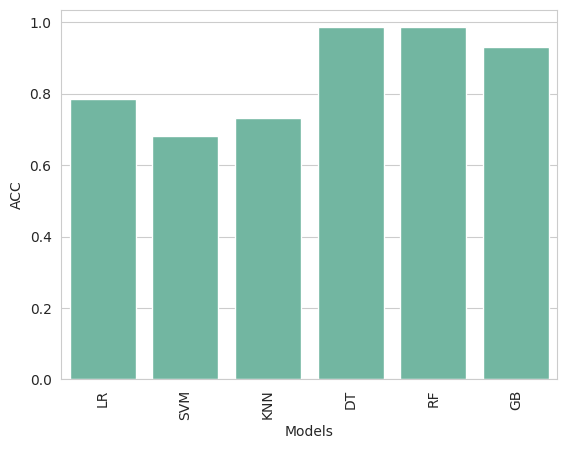

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing matplotlib to show the plot

sns.barplot(x='Models', y='ACC', data=final_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()  # Display the plot


<ipython-input-58-d6275fa34ad7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(final_data, x='ACC', y='Models', inner='stick', palette='Dark2')


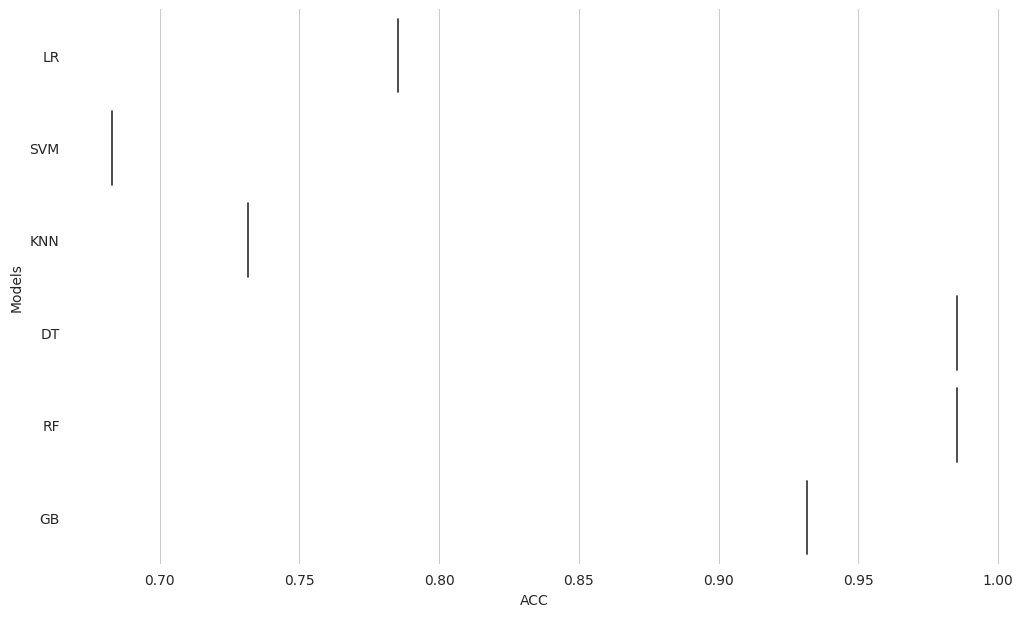

In [58]:
# Models vs ACC

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(final_data['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_data, x='ACC', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

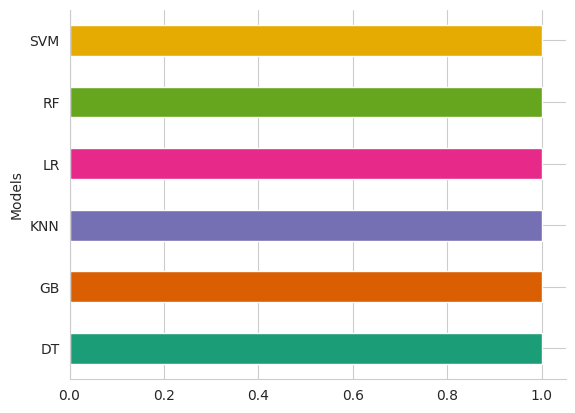

In [59]:
#Models

from matplotlib import pyplot as plt
import seaborn as sns
final_data.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
dataset = pd.get_dummies(heart_data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [63]:
y = dataset['target']
x = dataset.drop(['target'],axis = 1)

In [64]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

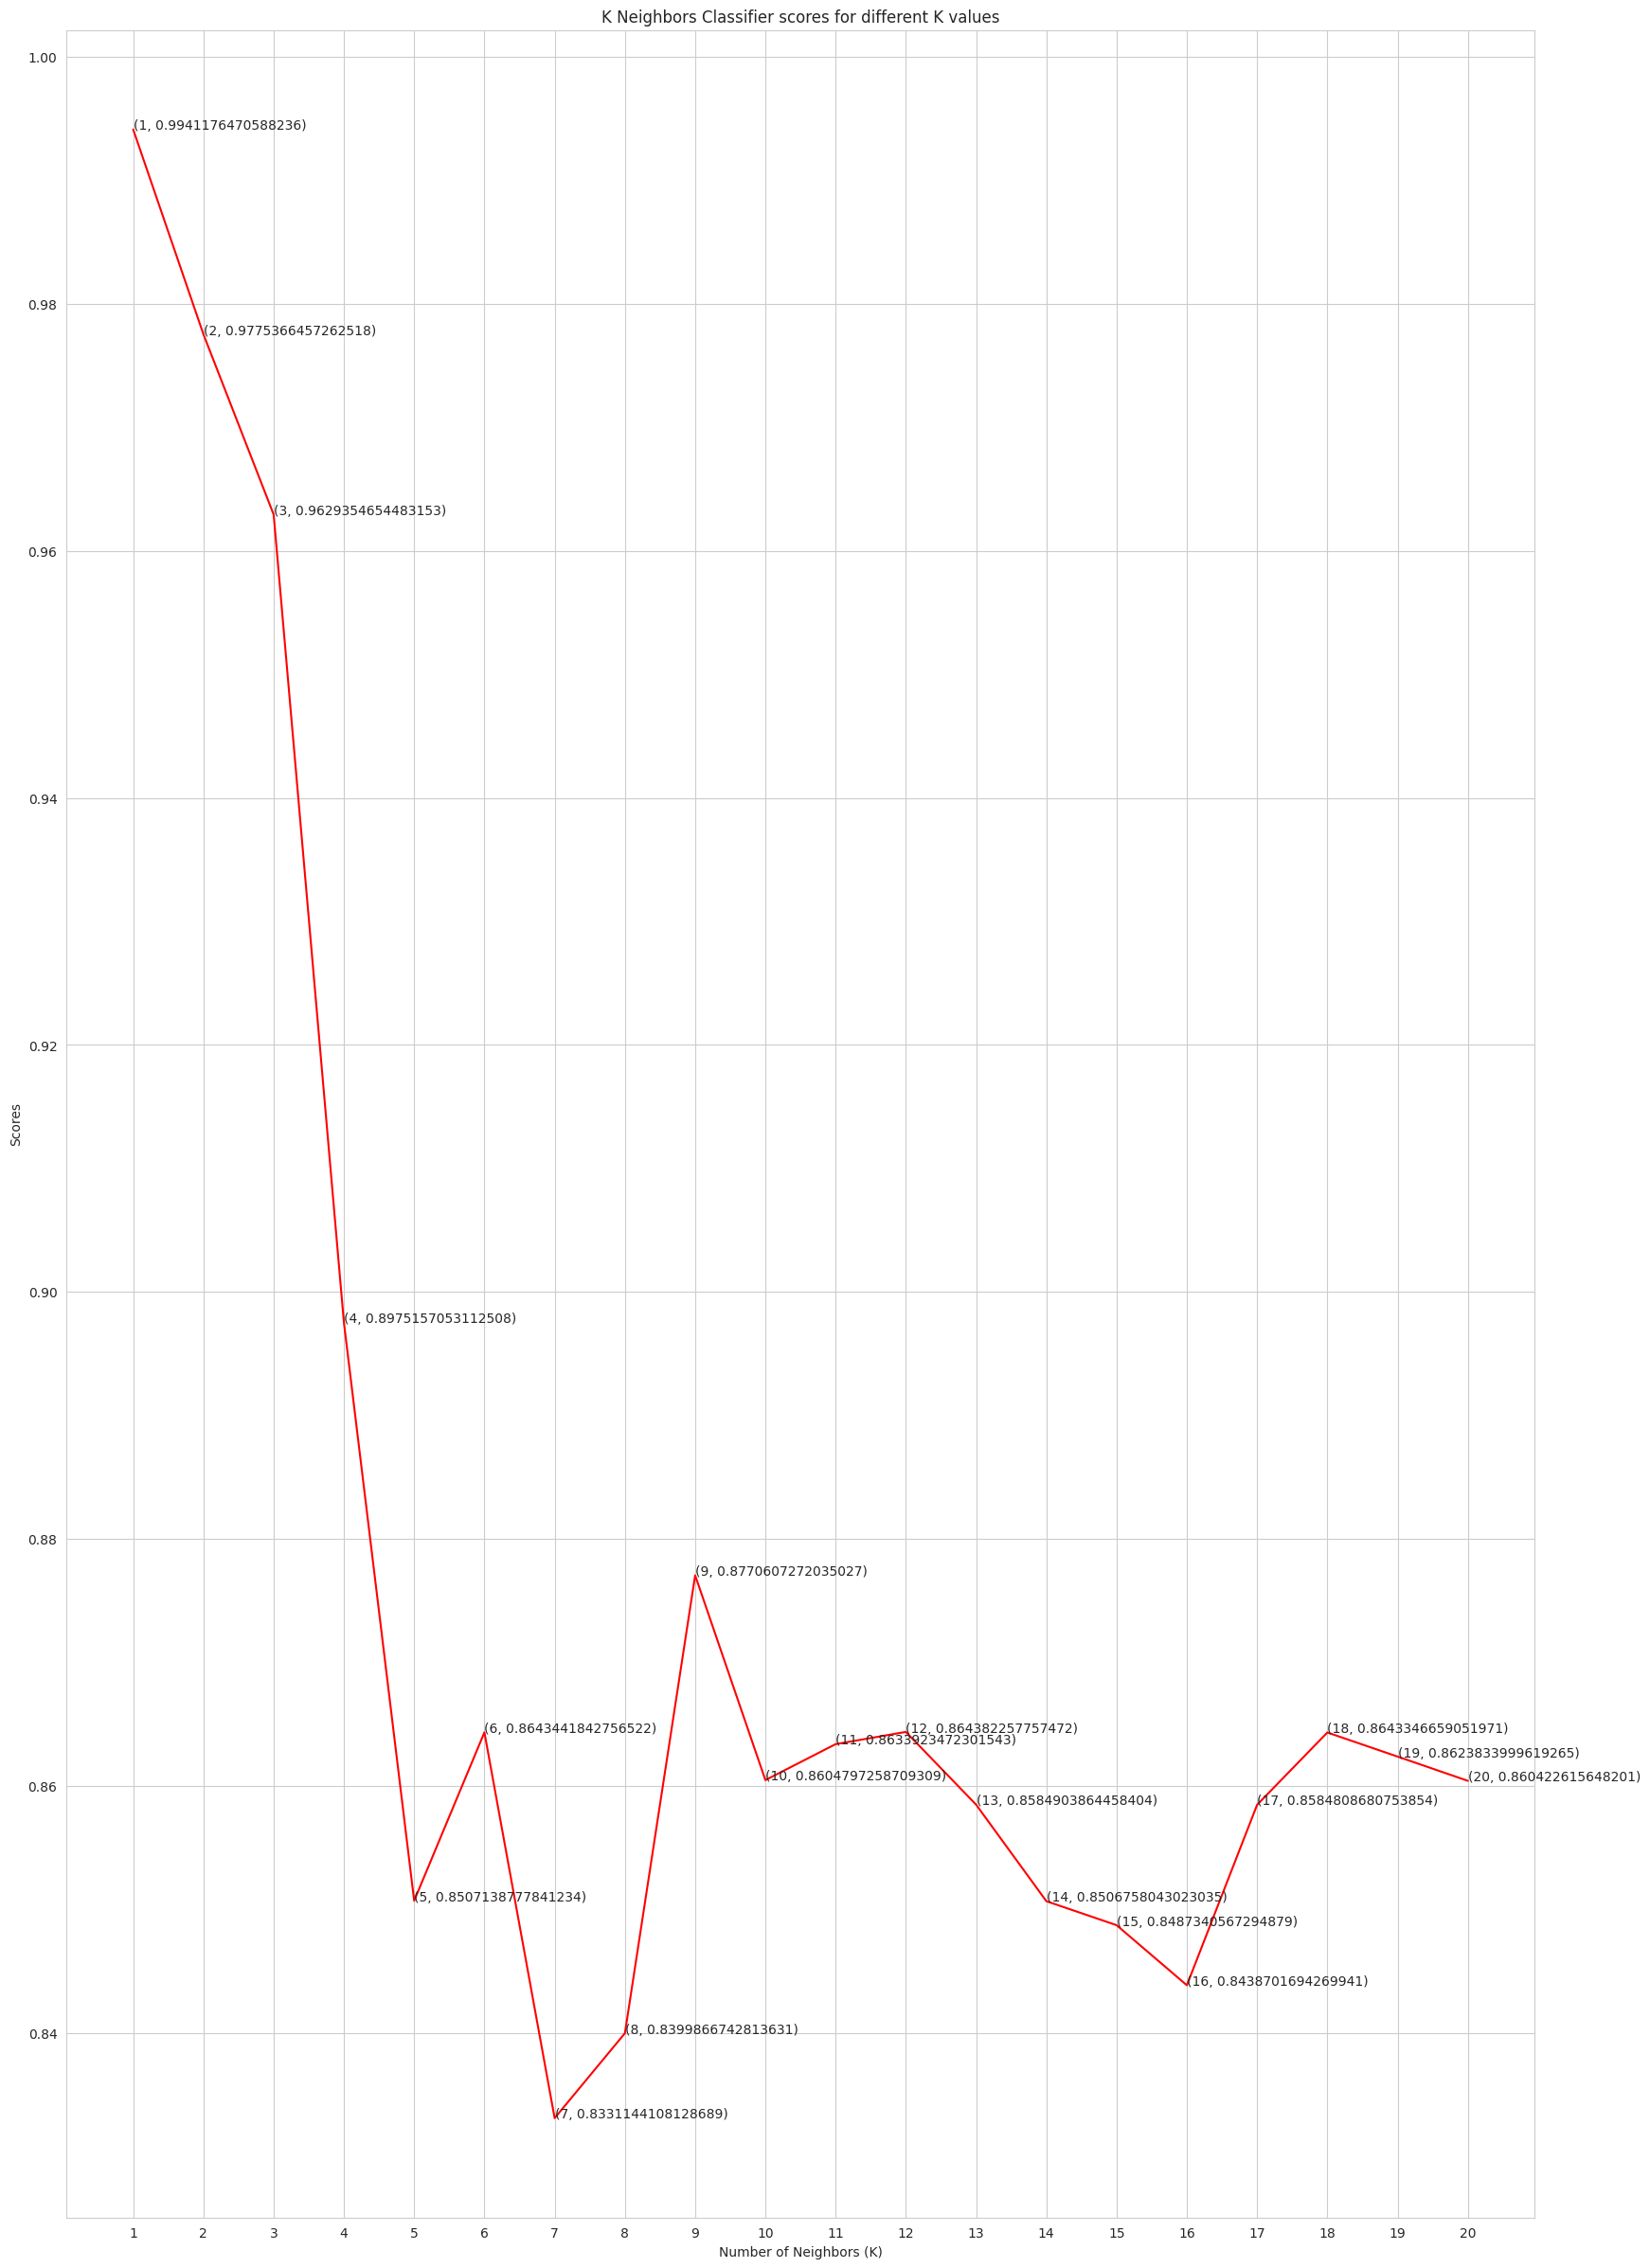

In [65]:
plt.figure(figsize=(20, 30))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [66]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)
knn_scores.append(score.mean())

In [67]:
knn_scores

[0.9941176470588236,
 0.9775366457262518,
 0.9629354654483153,
 0.8975157053112508,
 0.8507138777841234,
 0.8643441842756522,
 0.8331144108128689,
 0.8399866742813631,
 0.8770607272035027,
 0.8604797258709309,
 0.8633923472301543,
 0.864382257757472,
 0.8584903864458404,
 0.8506758043023035,
 0.8487340567294879,
 0.8438701694269941,
 0.8584808680753854,
 0.8643346659051971,
 0.8623833999619265,
 0.860422615648201,
 0.864382257757472]

## DISTRIBUTION

<ipython-input-68-f0f3a4d5b7f9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['age'])


<Axes: xlabel='age', ylabel='Density'>

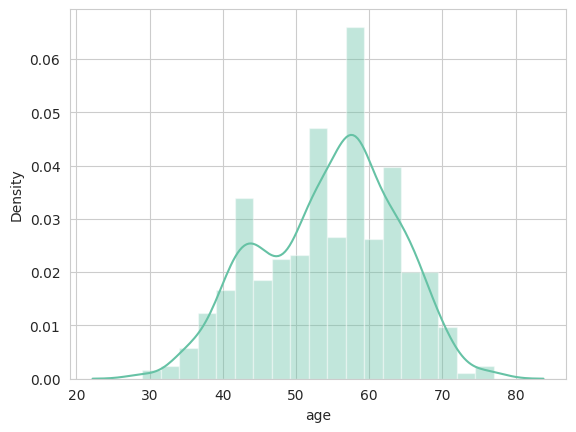

In [68]:
# importing packages
import seaborn as sns
 #age distribution
sns.distplot(heart_data['age'])

## CORRELATION MATRIX

In [69]:
# Correlation matrix
heart_data.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [70]:
!pip install seaborn

<Axes: >

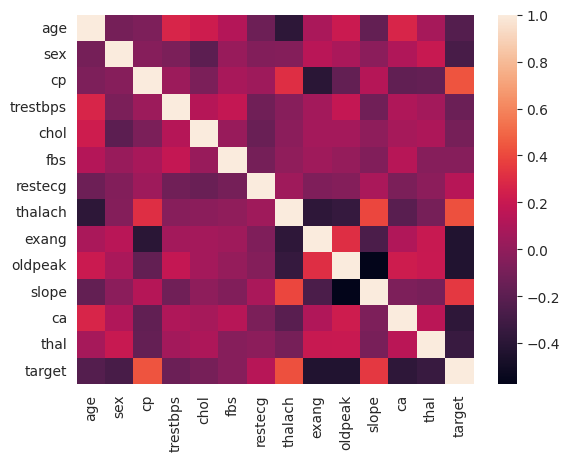

In [71]:
sns.heatmap(heart_data.corr())

## EVALUATION AND CONFUSION METRICS

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)

In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
#make predictions of the test set
y_pred = model.predict(x_test)
#evaluate the model with accuracy, F1 score, precisionn and recall


In [94]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_report_logistic = classification_report(y_test, y_pred)


In [95]:
print("Accuracy:", accuracy)
print("F1:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classification_report_logistic)


Accuracy: 0.7853658536585366
F1: 0.7836040238282567
Precision: 0.7942724681083881
Recall: 0.7853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



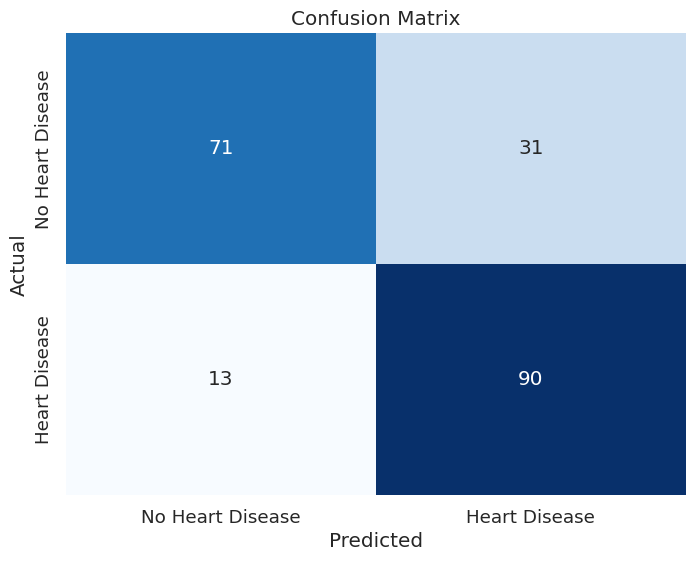

In [96]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true labels and predicted labels
# Example:
# y_true = [1, 0, 1, 1, 0]
# y_pred = [1, 0, 1, 0, 0]

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['No Heart Disease', 'Heart Disease']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Adjust to fit labels

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


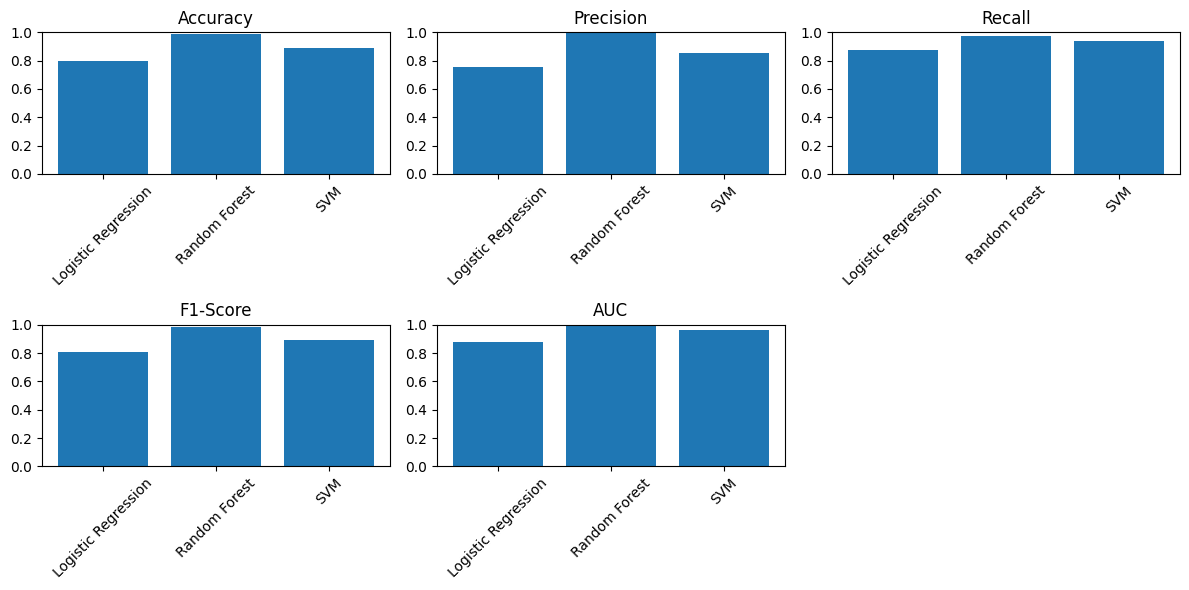

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing the heart disease dataset
X = heart_data.drop('target', axis=1)
y = heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

results_df = pd.DataFrame(results)

# Plotting the results
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.bar(results_df['Model'], results_df[metric])
    plt.title(metric)
    plt.ylim([0, 1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define features and target variable
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate classifiers
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append([name, accuracy, precision, recall, f1, auc])

# Create a DataFrame to store the results
results_heart_data = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Display the results
print(results_heart_data)


            Classifier  Accuracy  Precision    Recall  F1 Score       AUC
0                  KNN  0.834146   0.800000  0.893204  0.844037  0.948553
1                  SVM  0.887805   0.850877  0.941748  0.894009  0.963164
2        Random Forest  0.985366   1.000000  0.970874  0.985222  1.000000
3  Logistic Regression  0.795122   0.756303  0.873786  0.810811  0.878736
4    Gradient Boosting  0.931707   0.915888  0.951456  0.933333  0.980678
5        Decision Tree  0.985366   1.000000  0.970874  0.985222  0.985437
